## 1. Import Libraries

In [1]:
import geopandas as gpd
import geoplot as gplt
import folium
import shapely 
import contextily as ctx
from contextily import Place
import xyzservices.providers as xyz
import mapclassify as mc
import matplotlib.pyplot as plt
import math


## 2. Basic Maps

### 2a: Read the Dataset 

In [2]:
world_map = gpd.read_file(gplt.datasets.get_path('world'))

### 2b: Create boundary plot 

Text(0.5, 91.70778077307745, 'Latitude in degrees (°)')

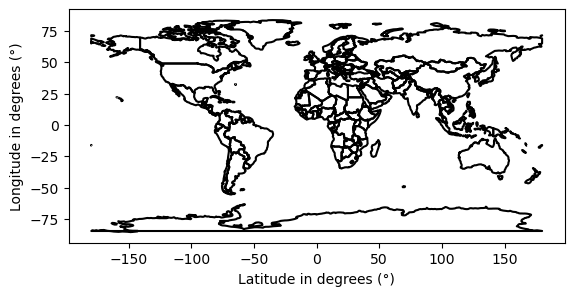

In [3]:
world_map.boundary.plot( edgecolor='black')
plt.ylabel("Longitude in degrees (" + u"\u00B0" + ")")
plt.xlabel("Latitude in degrees (" + u"\u00B0" + ")")


### 2c: Create basic plot 

Text(0.5, 174.18611859936024, 'Latitude in degrees (°)')

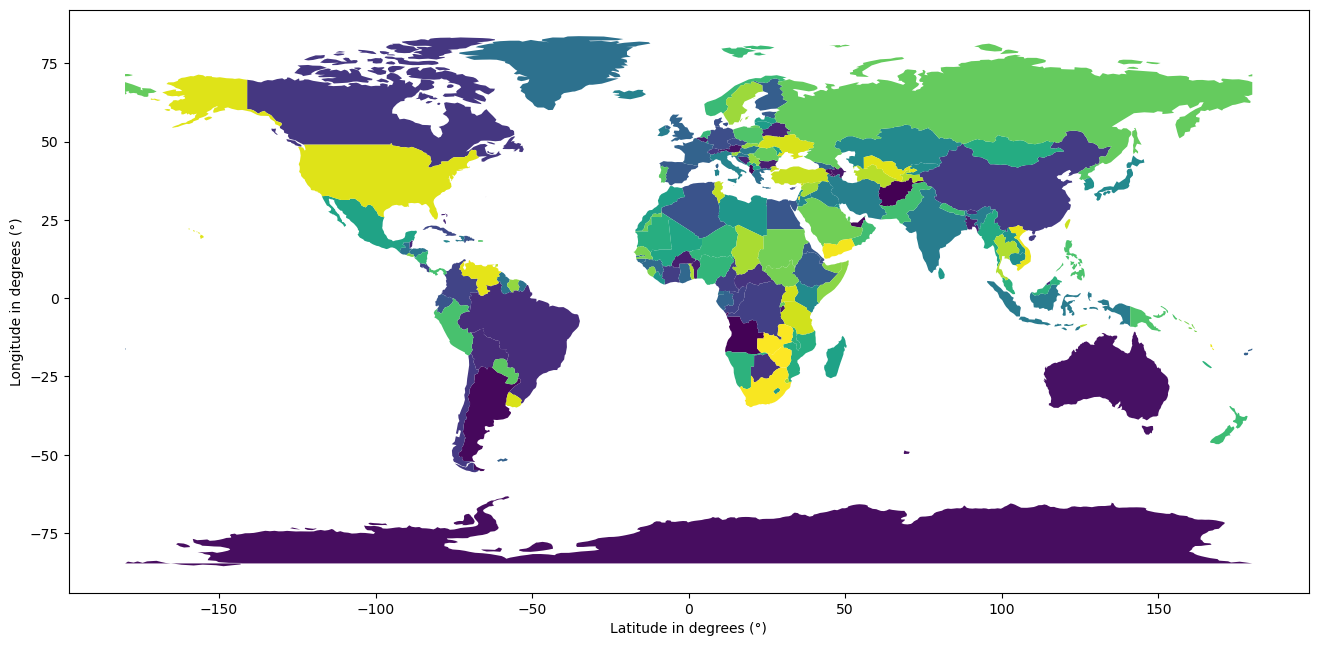

In [4]:
world_map.plot(cmap='viridis', figsize=(16, 10))
plt.ylabel("Longitude in degrees (" + u"\u00B0" + ")")
plt.xlabel("Latitude in degrees (" + u"\u00B0" + ")")


### 2d: Create stacked plot 

Text(0.5, 174.18611859936024, 'Latitude in degrees (°)')

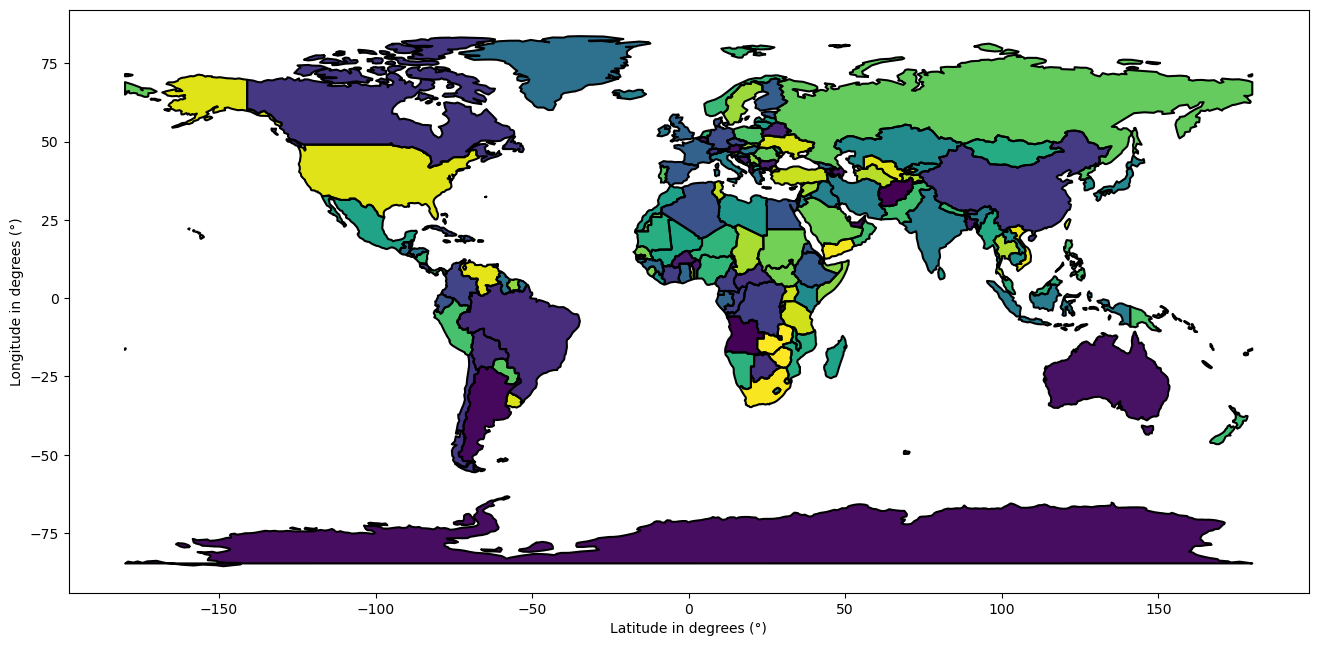

In [5]:
ax = world_map.plot(cmap='viridis', figsize=(16, 10))
world_map.boundary.plot(ax=ax, edgecolor='black')
plt.ylabel("Longitude in degrees (" + u"\u00B0" + ")")
plt.xlabel("Latitude in degrees (" + u"\u00B0" + ")")


## 3: Calculate Geometries

Current CRS is :  EPSG:4326


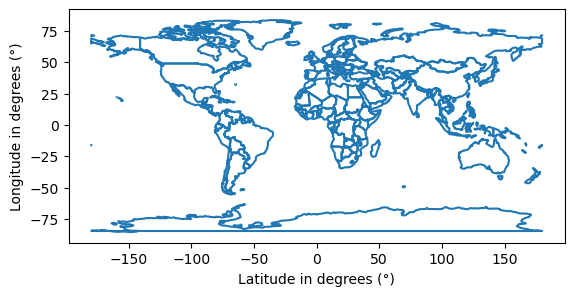

In [6]:
print("Current CRS is : ", world_map.crs)
world_map['boundary'] = world_map.boundary
world_map['boundary'].plot()
plt.ylabel("Longitude in degrees (" + u"\u00B0" + ")")
plt.xlabel("Latitude in degrees (" + u"\u00B0" + ")")

world_map = world_map.to_crs(3857)

world_map['centroid'] = world_map.centroid

world_map['area']=world_map.area


## 4: Create World Population Map

Text(0.5, 1.0, 'The World population Plot')

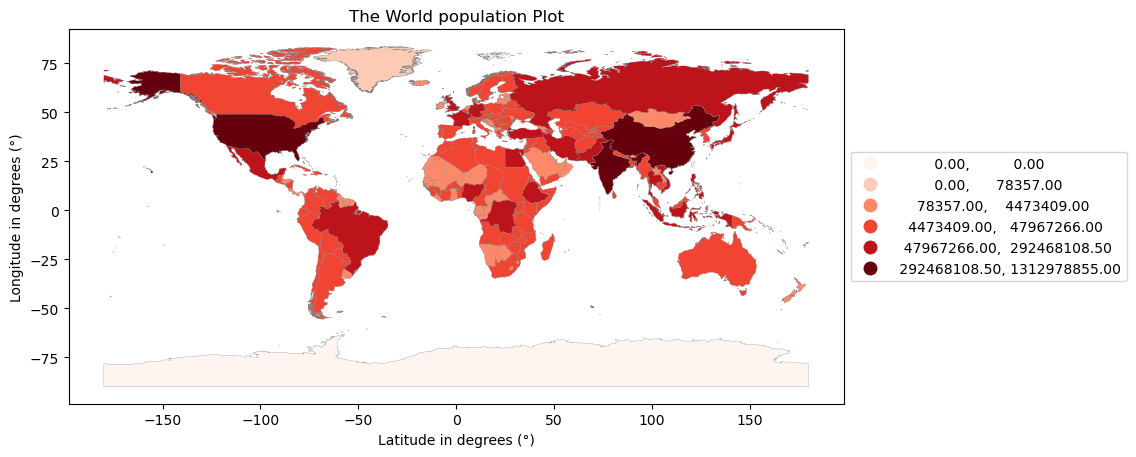

In [7]:
world_pop = gpd.read_file('https://raw.githubusercontent.com/MinnPost/simple-map-d3/master/example-data/world-population.geo.json')
world_pop['POP2005']=world_pop['POP2005'].astype(float)

world_pop.plot(cmap='Reds',linewidth=0.2, 
    edgecolor='gray',column='POP2005', scheme = 'percentiles',
    legend=True,figsize=(10, 10),
    legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)},
    )
plt.ylabel("Longitude in degrees (" + u"\u00B0" + ")")
plt.xlabel("Latitude in degrees (" + u"\u00B0" + ")")
plt.title("The World population Plot")


## 5: Plot US State Areas

### 5a: Read the file and filter the non continental states

In [8]:
states = gpd.read_file('./cb_2022_us_state_20m/cb_2022_us_state_20m.shp')
states = states.to_crs("EPSG:3395")
filtered_rows = states[(states['NAME'] == 'Puerto Rico') | (states['NAME'] == 'Hawaii') | (states['NAME'] == 'Alaska') ].index
states.drop(filtered_rows , inplace=True)

### 5b: Plot the area

Text(0.5, 1.0, 'US State Area in Square Miles')

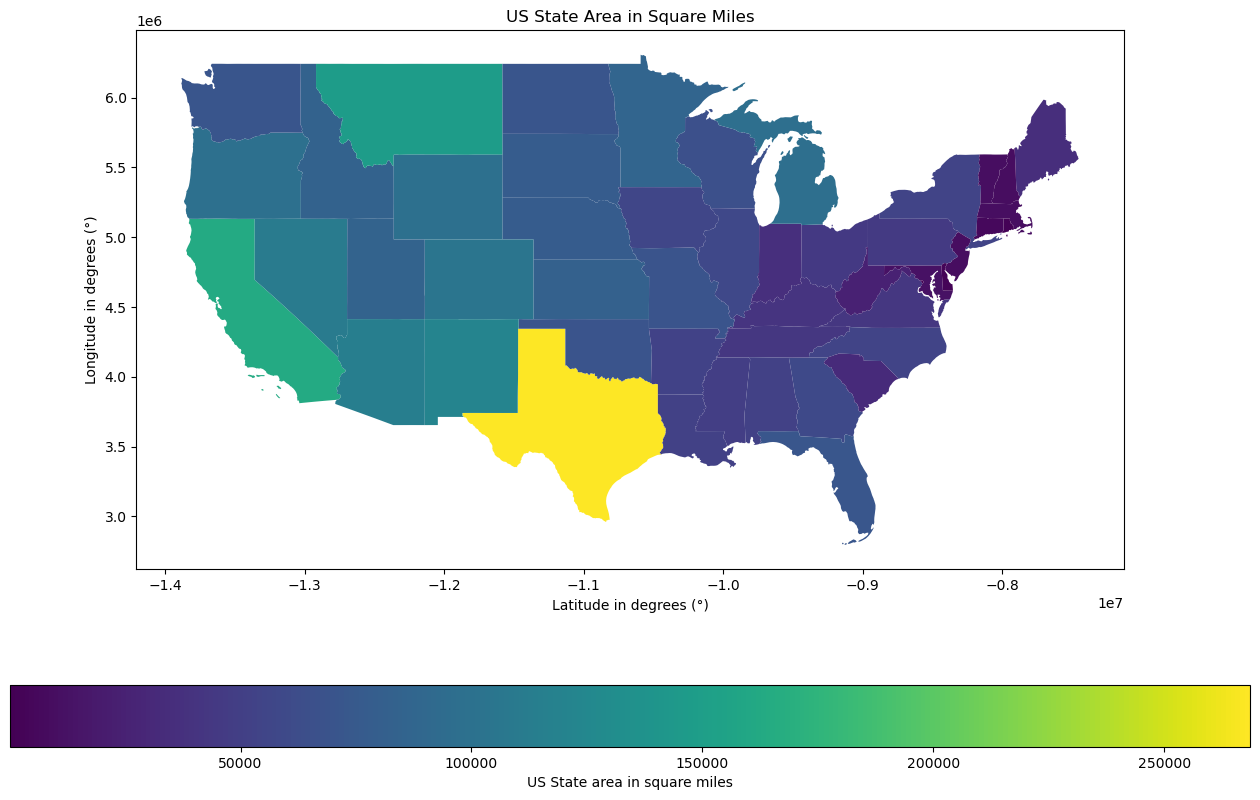

In [9]:
states['ALAND_miles'] = (states['ALAND']+states['AWATER'])/(2.59*1000000)
ax = states.plot(column='ALAND_miles', figsize=(16, 10), legend=True, legend_kwds={"label": "US State area in square miles", 'orientation': "horizontal"},)
plt.ylabel("Longitude in degrees (" + u"\u00B0" + ")")
plt.xlabel("Latitude in degrees (" + u"\u00B0" + ")")
plt.title('US State Area in Square Miles')


### 5c: Write area on state 

Text(0.5, 1.0, 'US State Area in Square Miles')

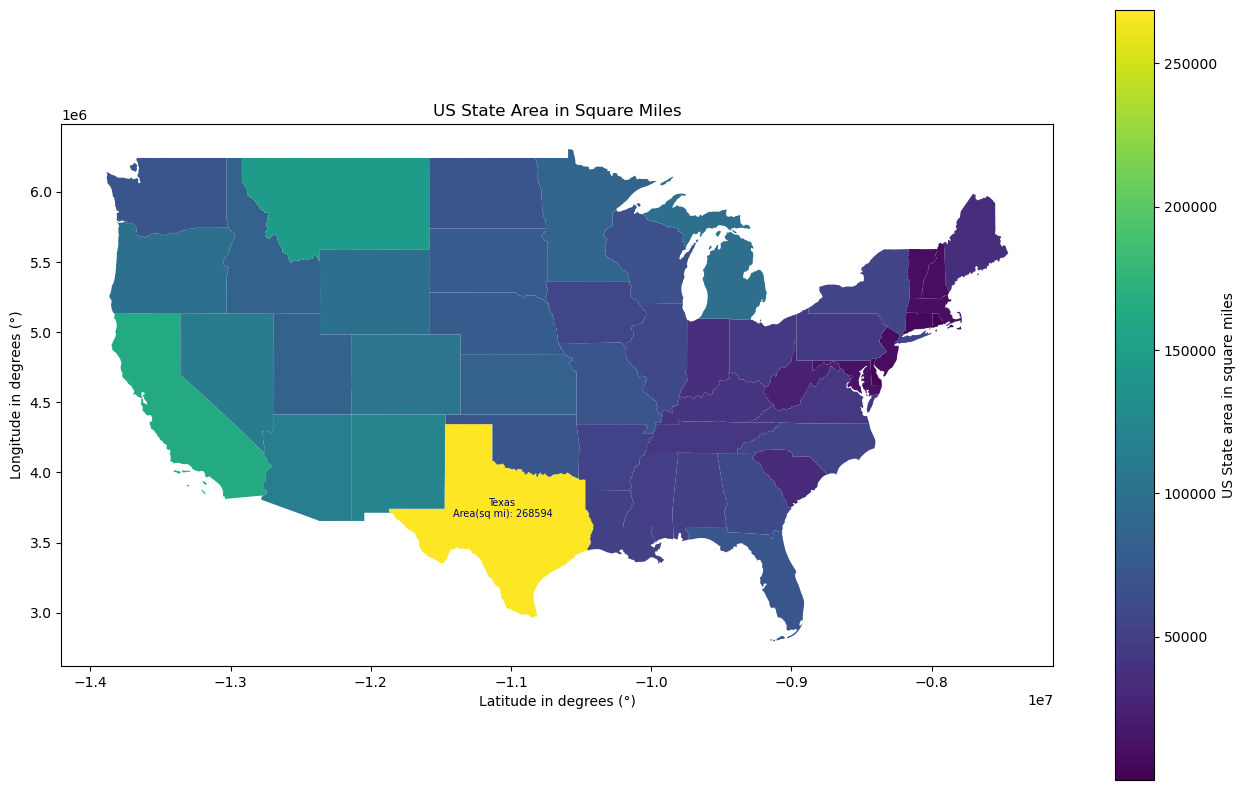

In [10]:
ax = states.plot(column='ALAND_miles', figsize=(16, 10), legend=True, legend_kwds={"label": "US State area in square miles"},)
filter = states[states['NAME'] == 'Texas']
filter.apply(lambda x: ax.annotate("Texas \n" + "Area(sq mi): " + str(math.floor(x.ALAND_miles)), xy=x.geometry.centroid.coords[0], ha='center', color='#000077',
fontsize=7), axis=1);
plt.ylabel("Longitude in degrees (" + u"\u00B0" + ")")
plt.xlabel("Latitude in degrees (" + u"\u00B0" + ")")
plt.title('US State Area in Square Miles')     


## 6: Create Interactive Map of Tornadoes in US States

### 6a: Read and clean the dataset

In [11]:
tornadoes = gpd.read_file('./1950-2022-torn-aspath/1950-2022-torn-aspath.shp')
tornadoes_dir = tornadoes[['yr', 'date', 'time', 'st', 'inj', 'fat', 'loss', 'geometry']]
tornadoes_dir = tornadoes_dir.rename({'yr': 'Year', 'st': 'State', 'inj': 'Injuries', 'fat': 'Fatalities', 'loss': 'Estimated Loss'}, axis=1)  # new method
torn_2022 = tornadoes_dir[tornadoes_dir['Year'] == 2022]
torn_2021 = tornadoes_dir[tornadoes_dir['Year'] == 2021]

### 6b: Create interactive map

In [12]:
usa_states = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
m = usa_states.explore(name="countries")
m = torn_2021.explore(m=m,color="red", name="Tornado 2021")
m = torn_2022.explore(m=m,color="green", name="Tornado 2022")
folium.LayerControl().add_to(m) 
m 


## 7: Create Basic Plots in Geoplot

### 7a: Read the dataset and remove the non continental states

In [13]:
usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
filtered_rows = usa_cities[(usa_cities['STATE'] == 'PR') | (usa_cities['STATE'] == 'HI') | (usa_cities['STATE'] == 'AK') ].index
usa_cities.drop(filtered_rows , inplace=True)



### 7b: Polyplot

<AxesSubplot:>

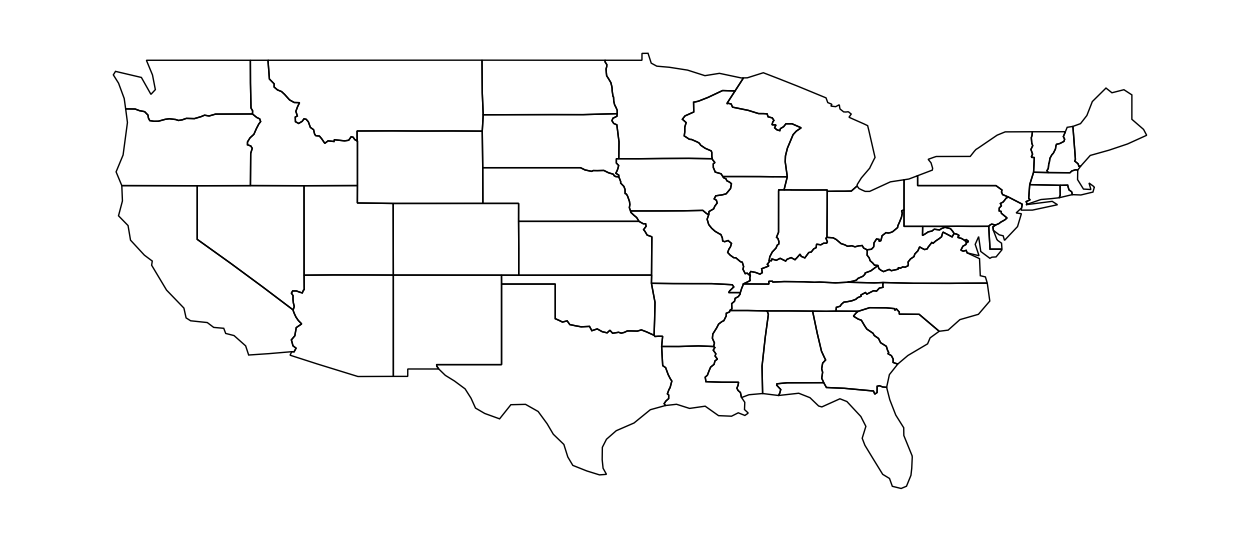

In [14]:
gplt.polyplot(usa_states, figsize=(16, 10))

### 7c: pointplot

<AxesSubplot:>

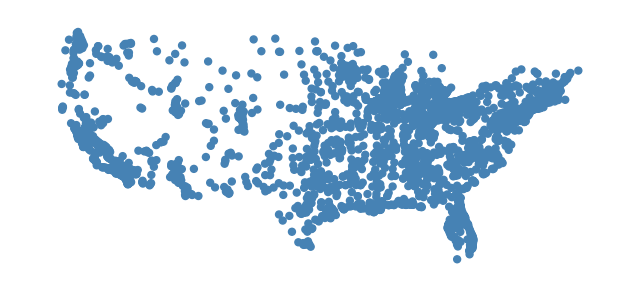

In [15]:
gplt.pointplot(usa_cities)

### 7d: Stacked plots 

Text(0.5, 1.0, 'US states and cities')

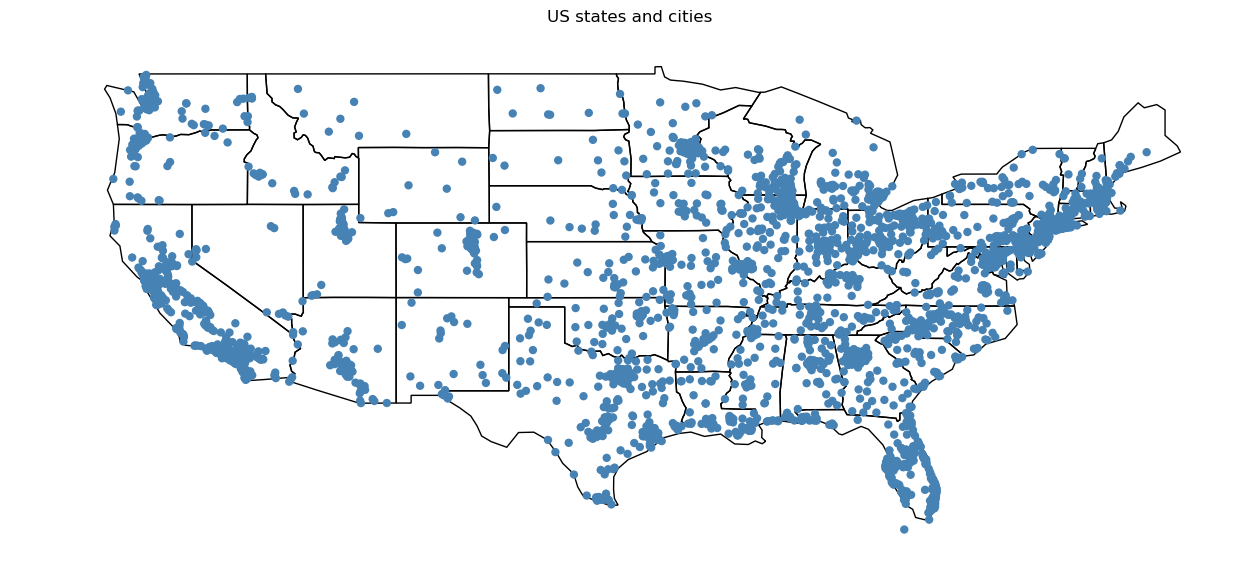

In [16]:
ax = gplt.polyplot(usa_states, figsize=(16, 10))
gplt.pointplot(usa_cities, ax=ax)
plt.title('US states and cities')


## 8: Map Projection

Text(0.5, 1.0, 'Map with projection')

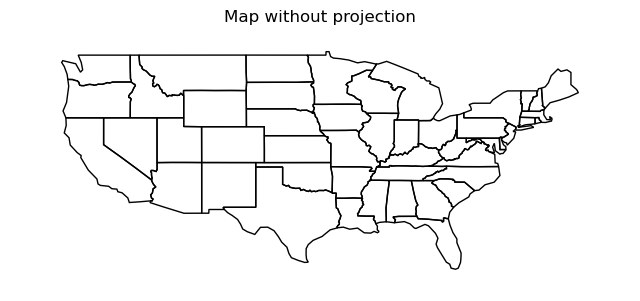

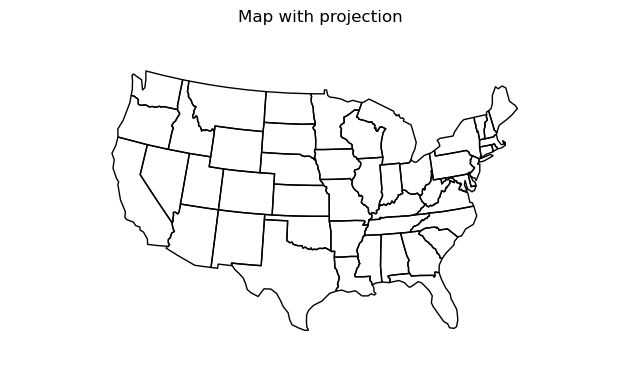

In [17]:
gplt.polyplot(usa_states)
plt.title("Map without projection")
gplt.polyplot(usa_states, projection=gplt.AlbersEqualArea())
plt.title("Map with projection")


## 9: Choropleth Map of US Population

Text(0.5, 1.0, 'United States Population, 2010')

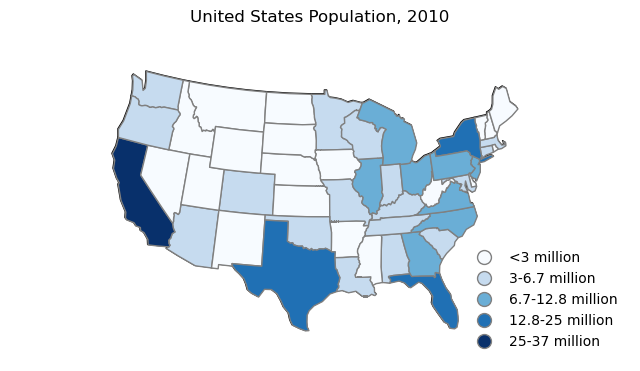

In [18]:
ax = gplt.polyplot(usa_states, projection=gplt.AlbersEqualArea())
gplt.choropleth(
    usa_states,
    hue="population",
    edgecolor="gray",
    linewidth=1,
    cmap="Blues",
    legend=True,
    scheme="FisherJenks",
    legend_labels=[
        "<3 million", "3-6.7 million", "6.7-12.8 million",
        "12.8-25 million", "25-37 million"
    ],
    legend_kwargs={'frameon': False, 'loc': 'lower right'},
    projection=gplt.AlbersEqualArea(),
    ax=ax
)
plt.title("United States Population, 2010")




## 10: Create basic Map Using Contextily Place and Providers

### 10a: Basic map 

<AxesSubplot:title={'center':'United Kingdom'}, xlabel='X', ylabel='Y'>

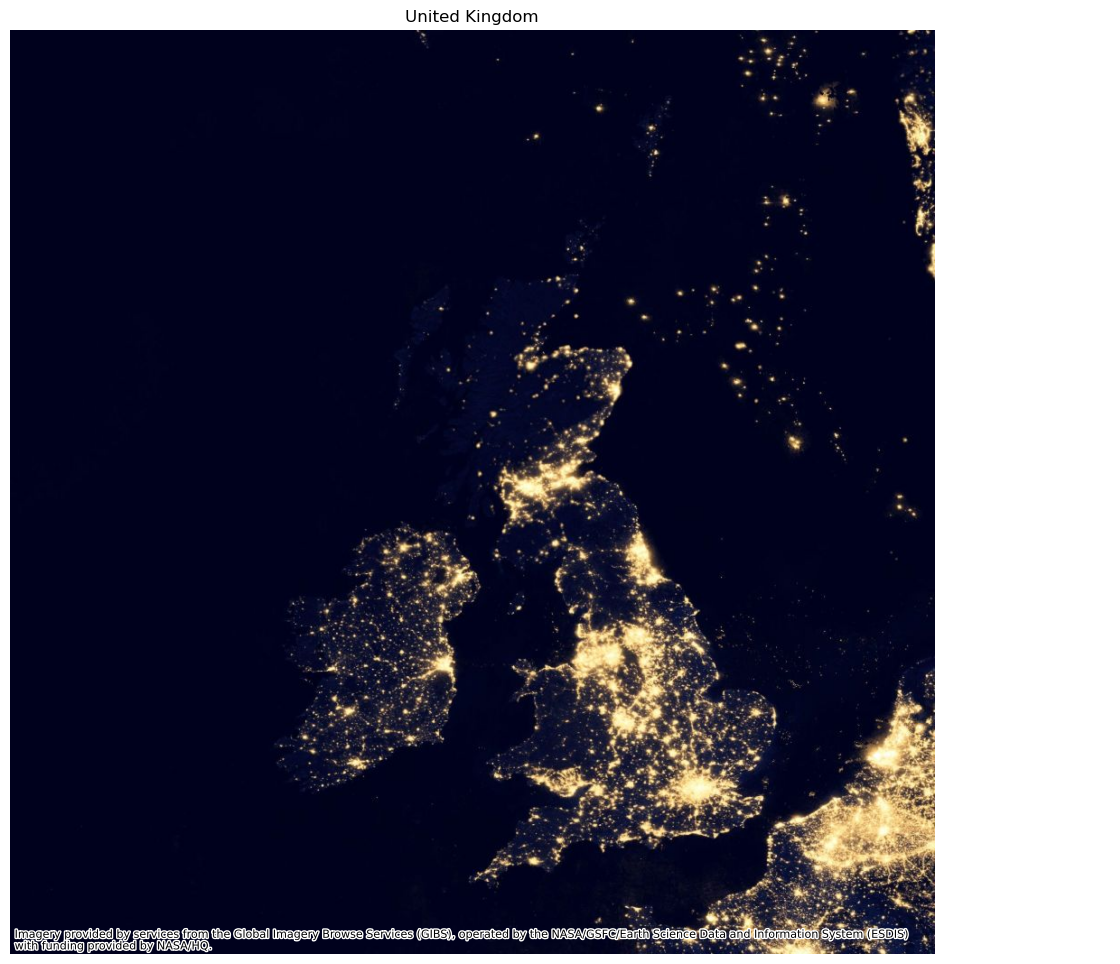

In [23]:
layer = ctx.providers.NASAGIBS.ViirsEarthAtNight2012

map = Place("United Kingdom", source=layer)
map.plot()


### 10b: Basic map with base layer 

<AxesSubplot:title={'center':'United Kingdom'}, xlabel='X', ylabel='Y'>

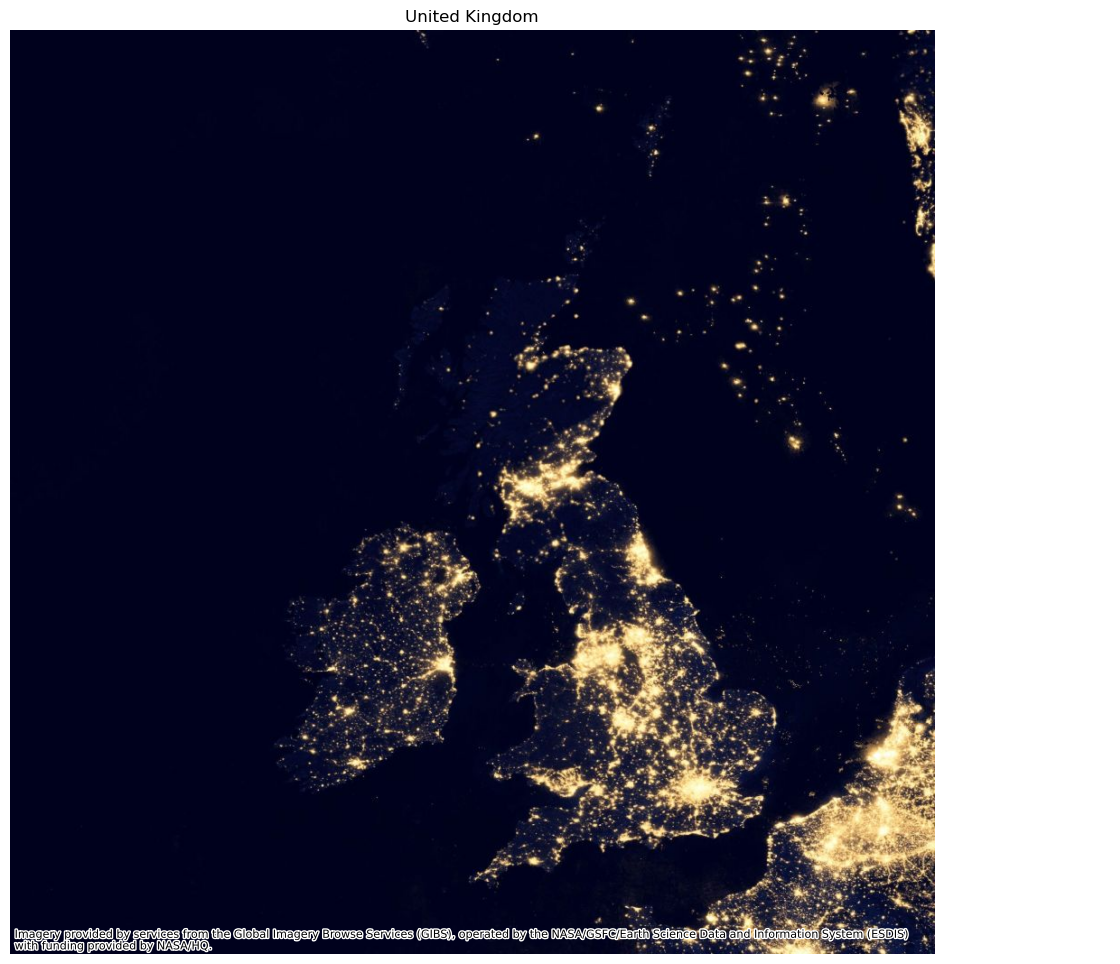

In [25]:
layer = ctx.providers.NASAGIBS.ViirsEarthAtNight2012
map = Place("United Kingdom", source=layer)
map.plot()


## 11: Create Stacked Maps Using Geopandas and Contextily

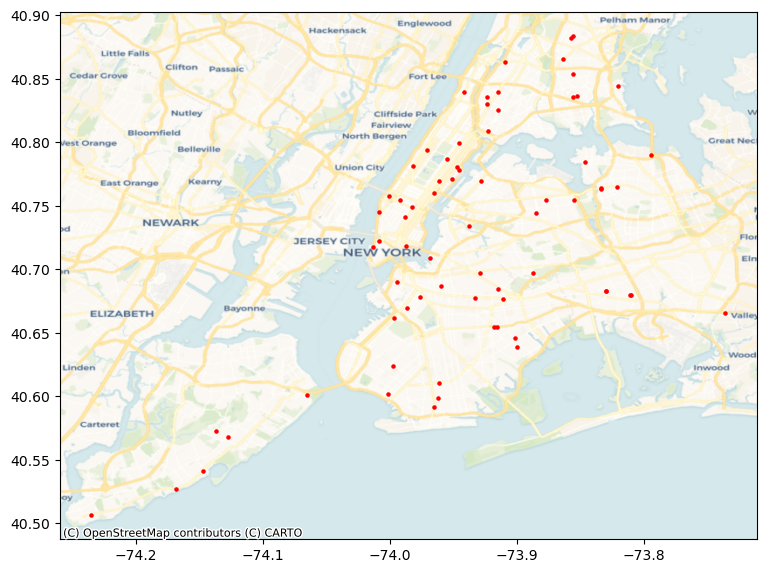

In [26]:
nyc_fat = gpd.read_file(gplt.datasets.get_path('nyc_fatal_collisions'))
ax = nyc_fat.plot(color="red", figsize=(9, 9), markersize=5)
ctx.add_basemap(ax, crs=nyc_fat.crs.to_string(), source=ctx.providers.CartoDB.Voyager)


## 12: Add multiple layers to the map

Text(0.5, 1.0, 'A stacked OpenStreetMap')

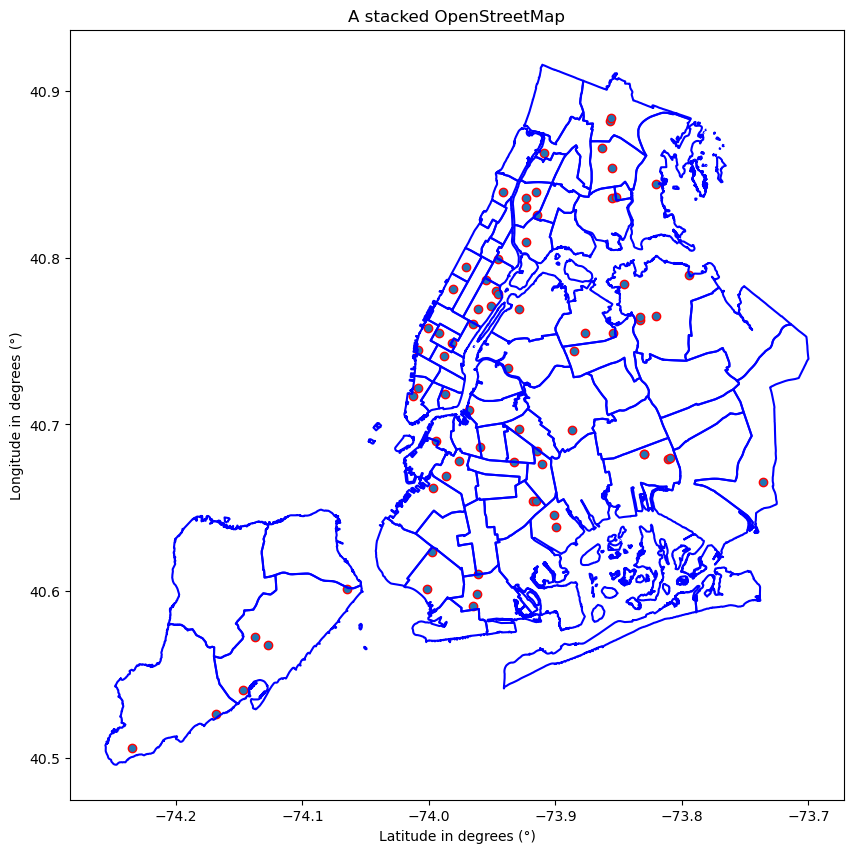

In [34]:
nyc_pre = gpd.read_file(gplt.datasets.get_path('nyc_police_precincts'))
ax = nyc_pre.boundary.plot(figsize=(10, 10), alpha=1.0, edgecolor='blue')
nyc_fat.plot(ax=ax, figsize=(10, 10), alpha=1.0, edgecolor='red')
nyc_fat = gpd.read_file(gplt.datasets.get_path('nyc_fatal_collisions'))

# ctx.add_basemap(ax, crs=nyc_fat.crs.to_string())
plt.ylabel("Longitude in degrees (" + u"\u00B0" + ")")
plt.xlabel("Latitude in degrees (" + u"\u00B0" + ")")
plt.title("A stacked OpenStreetMap")


## 13: Create Webmaps for Data Visualization

Text(0.5, 1.0, 'United States cities elevation in ft, 2010')

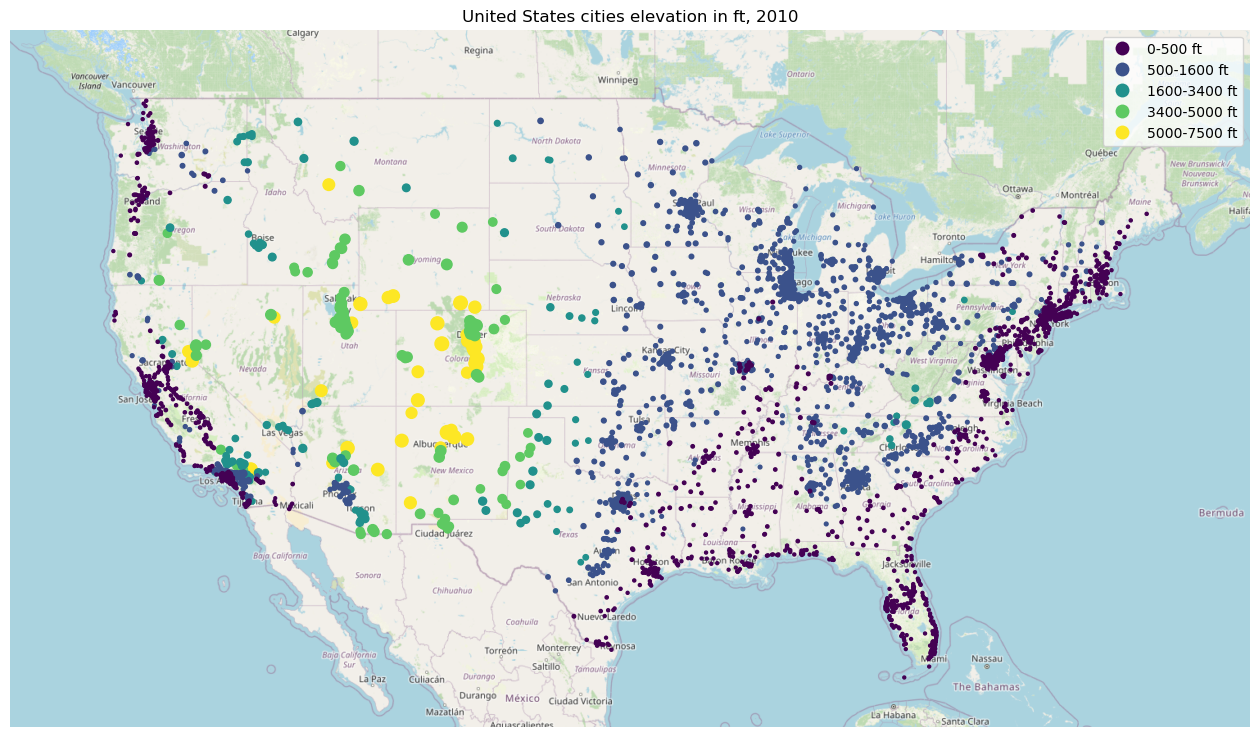

In [35]:
ax = gplt.webmap(usa_cities, projection=gplt.crs.WebMercator(), figsize = (16, 16))

bins = mc.FisherJenks(usa_cities['ELEV_IN_FT'], k=5)

gplt.pointplot(
  usa_cities, 
  ax=ax, 
  hue = 'ELEV_IN_FT',   
  projection=gplt.AlbersEqualArea(),
  scheme = bins,
  scale='ELEV_IN_FT', 
  limits=(2, 10),
  cmap='viridis',
  legend_var='hue',
  legend=True,
  legend_labels=['0-500 ft', '500-1600 ft', '1600-3400 ft', '3400-5000 ft', '5000-7500 ft'])
plt.title("United States cities elevation in ft, 2010")




## 14: KDE Map of San Francisco trees

Text(0.5, 1.0, 'San Francisco Trees')

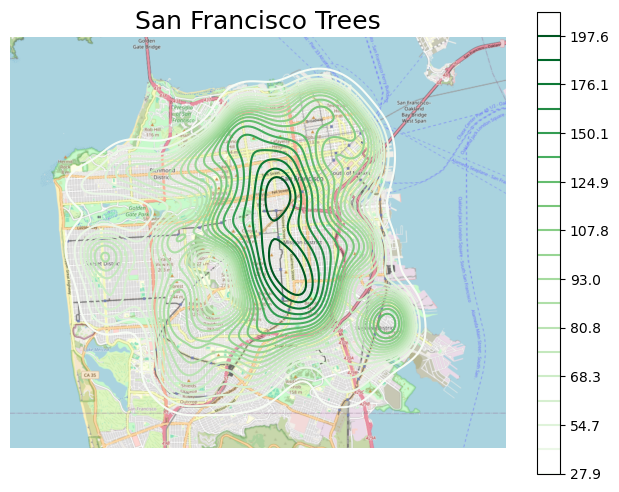

In [36]:
san = gpd.read_file(gplt.datasets.get_path('san_francisco'))
tree = gpd.read_file(gplt.datasets.get_path('san_francisco_street_trees_sample'))
ax = gplt.kdeplot(tree, n_levels=20, cmap='Greens', projection=gplt.WebMercator(), cbar=True, alpha=1)
gplt.webmap(san, ax=ax)
plt.title('San Francisco Trees', fontsize=18)


## 15: Cartogram of New York City population

Text(0.5, 1.0, 'Cartogram of New York City Population')

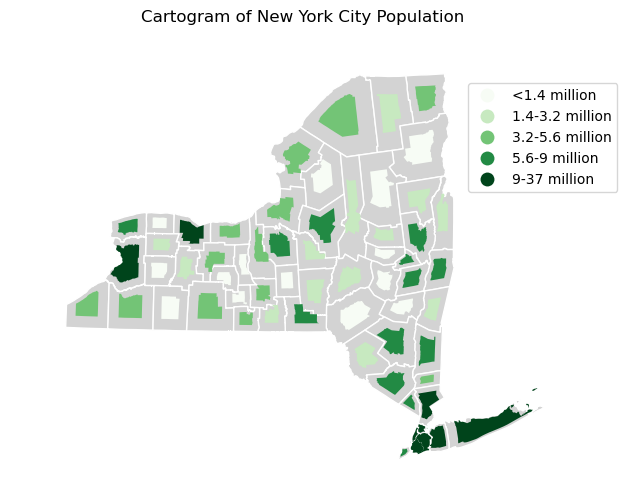

In [37]:
cen_nyc = gpd.read_file(gplt.datasets.get_path('ny_census'))
scheme = mc.Quantiles(cen_nyc['POP2000'], k=5)
ax = gplt.cartogram(
    cen_nyc, scale='POP2000', projection=gplt.AlbersEqualArea(),
    legend=True, legend_kwargs={'bbox_to_anchor': (1.05, 0.9)}, legend_var='hue',
    hue='POP2000', scheme=scheme, cmap='Greens',
     legend_labels=[
        '<1.4 million', '1.4-3.2 million', '3.2-5.6 million',
        '5.6-9 million', '9-37 million'
    ],
    limits=(0.5, 1)
)
gplt.polyplot(cen_nyc, facecolor='lightgray', edgecolor='white', ax=ax)
plt.title('Cartogram of New York City Population')
